# Negativity in the News and Hate Crimes

https://youtu.be/Kpt76rqvRwo

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

In this project we take a look at the FBI statistics on Hate Crime from 2010 to 2020 and the results of Sentimet Analysis done on articles released from that same time period to determine if they are in any way related.

# Names

- Scott Andrews
- Steven Youssef
- Connor Moore
- Sung Cho
- Edgar Diaz

<a id='research_question'></a>
# Research Question

*How has the negativity and divisiveness of news articles affected the trend of hate crimes in America from 2010-2020?*

<a id='background'></a>

## Background & Prior Work

We first started this project by looking for small examples of how the negative topics or words are very common in articles released nowadays. This sample article shows us how titles can be misleading, where it states that students being physically at school is how 70 cases of coronavirus arised but the article itself claims that they most likely obatined the virus before they returned to class[^clickbait].

The second article about the recent issue during the Oscars emphasizes the word "Ugliest" and this may have subtle psychological effects on people, or the fact that the news focuses at all on celebrity drama over real issues will upset many individuals.[^willsmith]. 

In our third and final example article, we have one who's title alone has many negative and haunting words. These words could stir the very people they mean to demean, or strike fear into those who hate those groups.[^wp].

References (include links):
- 1) [^willsmith]: Veloso, Lea. “Will & Jada Might Be Getting a Divorce after the Oscars Slap—& It Could Be One of the “Ugliest” in Hollywood.” StyleCaster, 21 Apr. 2022, stylecaster.com/will-smith-jada-pinkett-smith-divorce-rumors/. Accessed 22 Apr. 2022. 

Link: stylecaster.com/will-smith-jada-pinkett-smith-divorce-rumors/

- 2) [^clickbait]: “France Sees 70 Coronavirus Cases Linked to Schools Days after Reopening.” The Independent, 18 May 2020, www.independent.co.uk/news/world/europe/coronavirus-france-school-cases-reopen-lockdown-a9520386.html. Accessed 22 Apr. 2022.

Link: www.independent.co.uk/news/world/europe/coronavirus-france-school-cases-reopen-lockdown-a9520386.html

- 3) [^wp]: CNN, Geneva Sands. “White Supremacy Is “Most Lethal Threat” to the US, DHS Draft Assessment Says.” CNN, www.cnn.com/2020/09/08/politics/white-supremacy-dhs-draft-assessment/index.html. 

Link: www.cnn.com/2020/09/08/politics/white-supremacy-dhs-draft-assessment/index.html. 


# Hypothesis


*We think that the changes to how news articles are written in these past few decades (with the increase of yellow journalism) have increased the quantity and frequency of Hate Crimes in America throughout the 2010s.*

# Dataset(s)

Dataset #1
- Dataset Name: FBI Hate Crime Statistics 2010-2020
- Link to the dataset: https://crime-data-explorer.fr.cloud.gov/pages/explorer/crime/hate-crime
- Number of observations: 73,275


This dataset includes the FBI's crime statistics from the years 2010 to 2020. The set includes what type of Hate Crime it was, how many per type, and how many Hate Crimes per quarter of each year.

Dataset #2
- Dataset Name: Mediastack Articles
- Link to the dataset: https://mediastack.com/
- Number of observations: 1,000

This dataset includes articles from a specified country, time period, and company. Within the set we are given titles, descriptions of each articles,authors, category, and date of publish.

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import requests
import patsy
import scipy.stats as stats
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Endpoint news

media2010 = requests.get("http://api.mediastack.com/v1/news?access_key=f6684f42de28683def3a160551dfad22&languages=en&categories=general&limit=100&sources=nytimes")
media2011 = requests.get("http://api.mediastack.com/v1/news?access_key=f6684f42de28683def3a160551dfad22&languages=en&categories=general&limit=100&sources=bbc")
media2012 = requests.get("http://api.mediastack.com/v1/news?access_key=f6684f42de28683def3a160551dfad22&languages=en&categories=general&limit=100&sources=cnn")
media2013 = requests.get("http://api.mediastack.com/v1/news?access_key=f6684f42de28683def3a160551dfad22&languages=en&categories=general&limit=100&sources=time")
media2014 = requests.get("http://api.mediastack.com/v1/news?access_key=f6684f42de28683def3a160551dfad22&languages=en&categories=general&limit=100&sources=foxnews")
media2015 = requests.get("http://api.mediastack.com/v1/news?access_key=f6684f42de28683def3a160551dfad22&languages=en&categories=general&limit=100")
media2016 = requests.get("http://api.mediastack.com/v1/news?access_key=f6684f42de28683def3a160551dfad22&languages=en&categories=general&limit=100")
media2017 = requests.get("http://api.mediastack.com/v1/news?access_key=f6684f42de28683def3a160551dfad22&languages=en&categories=general&limit=100")
media2018 = requests.get("http://api.mediastack.com/v1/news?access_key=f6684f42de28683def3a160551dfad22&languages=en&categories=general&limit=100")
media2019 = requests.get("http://api.mediastack.com/v1/news?access_key=f6684f42de28683def3a160551dfad22&languages=en&categories=general&limit=100")
media2020 = requests.get("http://api.mediastack.com/v1/news?access_key=f6684f42de28683def3a160551dfad22&languages=en&categories=general&limit=100")



# Endpoint sources
'''
media2010 = requests.get("http://api.mediastack.com/v1/sources?access_key=f6684f42de28683def3a160551dfad22&search=story&languages=en&categories=general&limit=100")
media2011 = requests.get("http://api.mediastack.com/v1/sources?access_key=f6684f42de28683def3a160551dfad22&languages=en&categories=general&limit=100&search=program")
media2012 = requests.get("http://api.mediastack.com/v1/sources?access_key=f6684f42de28683def3a160551dfad22&languages=en&categories=general&limit=100&search=journal")
media2013 = requests.get("http://api.mediastack.com/v1/sources?access_key=f6684f42de28683def3a160551dfad22&languages=en&categories=general&limit=100&search=article")
media2014 = requests.get("http://api.mediastack.com/v1/sources?access_key=f6684f42de28683def3a160551dfad22&languages=en&categories=general&limit=100&search=version")
media2015 = requests.get("http://api.mediastack.com/v1/sources?access_key=f6684f42de28683def3a160551dfad22&languages=en&categories=general&limit=100&search=narrative")
media2016 = requests.get("http://api.mediastack.com/v1/sources?access_key=f6684f42de28683def3a160551dfad22&languages=en&categories=general&limit=100&search=sentiment")
media2017 = requests.get("http://api.mediastack.com/v1/sources?access_key=f6684f42de28683def3a160551dfad22&languages=en&categories=general&limit=100&search=record")
media2018 = requests.get("http://api.mediastack.com/v1/sources?access_key=f6684f42de28683def3a160551dfad22&languages=en&categories=general&limit=100&search=crime")
media2019 = requests.get("http://api.mediastack.com/v1/sources?access_key=f6684f42de28683def3a160551dfad22&languages=en&categories=general&limit=100&search=school")
media2020 = requests.get("http://api.mediastack.com/v1/sources?access_key=f6684f42de28683def3a160551dfad22&languages=en&categories=general&limit=100&search=law")
'''

responses2010 = media2010.json()
responses2011 = media2011.json()
responses2012 = media2012.json()
responses2013 = media2013.json()
responses2014 = media2014.json()
responses2015 = media2015.json()
responses2016 = media2016.json()
responses2017 = media2017.json()
responses2018 = media2018.json()
responses2019 = media2019.json()
responses2020 = media2020.json()

# Define the collected API responses
mediastack2010 = responses2010['data']
mediastack2011 = responses2011['data']
mediastack2012 = responses2012['data']
mediastack2013 = responses2013['data']
mediastack2014 = responses2014['data']
mediastack2015 = responses2015['data']
mediastack2016 = responses2016['data']
mediastack2017 = responses2017['data']
mediastack2018 = responses2018['data']
mediastack2019 = responses2019['data']
mediastack2020 = responses2020['data']
 
# Normalize or unnest the JSON response
flatData2010 = pd.json_normalize(mediastack2010)
flatData2011 = pd.json_normalize(mediastack2011)
flatData2012 = pd.json_normalize(mediastack2012)
flatData2013 = pd.json_normalize(mediastack2013)
flatData2014 = pd.json_normalize(mediastack2014)
flatData2015 = pd.json_normalize(mediastack2015)
flatData2016 = pd.json_normalize(mediastack2016)
flatData2017 = pd.json_normalize(mediastack2017)
flatData2018 = pd.json_normalize(mediastack2018)
flatData2019 = pd.json_normalize(mediastack2019)
flatData2020 = pd.json_normalize(mediastack2020)
 
# Create data frame, and save them to CSV
dfs2010 = pd.DataFrame(flatData2010)
dfs2011 = pd.DataFrame(flatData2011)
dfs2012 = pd.DataFrame(flatData2012)
dfs2013 = pd.DataFrame(flatData2013)
dfs2014 = pd.DataFrame(flatData2014)
dfs2015 = pd.DataFrame(flatData2015)
dfs2016 = pd.DataFrame(flatData2016)
dfs2017 = pd.DataFrame(flatData2017)
dfs2018 = pd.DataFrame(flatData2018)
dfs2019 = pd.DataFrame(flatData2019)
dfs2020 = pd.DataFrame(flatData2020)

Bias_2010 = pd.read_csv('HC_Bias_2010.csv')
Bias_2011 = pd.read_csv('HC_Bias_2011.csv')
Bias_2012 = pd.read_csv('HC_Bias_2012.csv')
Bias_2013 = pd.read_csv('HC_Bias_2013.csv')
Bias_2014 = pd.read_csv('HC_Bias_2014.csv')
Bias_2015 = pd.read_csv('HC_Bias_2015.csv')
Bias_2016 = pd.read_csv('HC_Bias_2016.csv')
Bias_2017 = pd.read_csv('HC_Bias_2017.csv')
Bias_2018 = pd.read_csv('HC_Bias_2018.csv')
Bias_2019 = pd.read_csv('HC_Bias_2019.csv')
Bias_2020 = pd.read_csv('HC_Bias_2020.csv')
IC_2010 = pd.read_csv('Incident-Count-by-Quarter_2010.csv')
IC_2011 = pd.read_csv('Incident-Count-by-Quarter_2011.csv')
IC_2012 = pd.read_csv('Incident-Count-by-Quarter_2012.csv')
IC_2013 = pd.read_csv('Incident-Count-by-Quarter_2013.csv')
IC_2014 = pd.read_csv('Incident-Count-by-Quarter_2014.csv')
IC_2015 = pd.read_csv('Incident-Count-by-Quarter_2015.csv')
IC_2016 = pd.read_csv('Incident-Count-by-Quarter_2016.csv')
IC_2017 = pd.read_csv('Incident-Count-by-Quarter_2017.csv')
IC_2018 = pd.read_csv('Incident-Count-by-Quarter_2018.csv')
IC_2019 = pd.read_csv('Incident-Count-by-Quarter_2019.csv')
IC_2020 = pd.read_csv('Incident-Count-by-Quarter_2020.csv')


# Data Cleaning

Describe your data cleaning steps here.

In [3]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
# Change Columns from "key" and "value" to "HC Type" and "Count"
Bias_2010.columns = ["hc_type","count"]
Bias_2011.columns = ["hc_type","count"]
Bias_2012.columns = ["hc_type","count"]
Bias_2013.columns = ["hc_type","count"]
Bias_2014.columns = ["hc_type","count"]
Bias_2015.columns = ["hc_type","count"]
Bias_2016.columns = ["hc_type","count"]
Bias_2017.columns = ["hc_type","count"]
Bias_2018.columns = ["hc_type","count"]
Bias_2019.columns = ["hc_type","count"]
Bias_2020.columns = ["hc_type","count"]
IC_2010.columns = ["quarter","count"]
IC_2011.columns = ["quarter","count"]
IC_2012.columns = ["quarter","count"]
IC_2013.columns = ["quarter","count"]
IC_2014.columns = ["quarter","count"]
IC_2015.columns = ["quarter","count"]
IC_2016.columns = ["quarter","count"]
IC_2017.columns = ["quarter","count"]
IC_2018.columns = ["quarter","count"]
IC_2019.columns = ["quarter","count"]
IC_2020.columns = ["quarter","count"] 

#Function for resetting index for IC data 
# Files were sorted by highest count originally, adjusted to be sorted by quarter #.
def sort_ic_index(df_input):
    df_input = df_input.sort_values("quarter")
    df_input = df_input.reset_index(drop=True)
    return df_input

IC_2010 = sort_ic_index(IC_2010)
IC_2011 = sort_ic_index(IC_2011)
IC_2012 = sort_ic_index(IC_2012)
IC_2013 = sort_ic_index(IC_2013)
IC_2014 = sort_ic_index(IC_2014)
IC_2015 = sort_ic_index(IC_2015)
IC_2016 = sort_ic_index(IC_2016)
IC_2017 = sort_ic_index(IC_2017)
IC_2018 = sort_ic_index(IC_2018)
IC_2019 = sort_ic_index(IC_2019)
IC_2020 = sort_ic_index(IC_2020)

years = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
quarters = ['2010_1','2010_2','2010_3','2010_4',
            '2011_1','2011_2','2011_3','2011_4',
            '2012_1','2012_2','2012_3','2012_4',
            '2013_1','2013_2','2013_3','2013_4',
            '2014_1','2014_2','2014_3','2014_4',
            '2015_1','2015_2','2015_3','2015_4',
            '2016_1','2016_2','2016_3','2016_4',
            '2017_1','2017_2','2017_3','2017_4',
            '2018_1','2018_2','2018_3','2018_4',
            '2019_1','2019_2','2019_3','2019_4',
            '2020_1','2020_2','2020_3','2020_4']

# Get the count of the amount of hate crimes of the specified type, for each year
def getHCCount(str_in):
    tempList = []
    tempList.append(Bias_2010[Bias_2010.hc_type.isin([str_in])]['count'][Bias_2010[Bias_2010.hc_type.isin([str_in])]['count'].index[0]])
    tempList.append(Bias_2011[Bias_2011.hc_type.isin([str_in])]['count'][Bias_2011[Bias_2011.hc_type.isin([str_in])]['count'].index[0]])
    tempList.append(Bias_2012[Bias_2012.hc_type.isin([str_in])]['count'][Bias_2012[Bias_2012.hc_type.isin([str_in])]['count'].index[0]])
    tempList.append(Bias_2013[Bias_2013.hc_type.isin([str_in])]['count'][Bias_2013[Bias_2013.hc_type.isin([str_in])]['count'].index[0]])
    tempList.append(Bias_2014[Bias_2014.hc_type.isin([str_in])]['count'][Bias_2014[Bias_2014.hc_type.isin([str_in])]['count'].index[0]])
    tempList.append(Bias_2015[Bias_2015.hc_type.isin([str_in])]['count'][Bias_2015[Bias_2015.hc_type.isin([str_in])]['count'].index[0]])
    tempList.append(Bias_2016[Bias_2016.hc_type.isin([str_in])]['count'][Bias_2016[Bias_2016.hc_type.isin([str_in])]['count'].index[0]])
    tempList.append(Bias_2017[Bias_2017.hc_type.isin([str_in])]['count'][Bias_2017[Bias_2017.hc_type.isin([str_in])]['count'].index[0]])
    tempList.append(Bias_2018[Bias_2018.hc_type.isin([str_in])]['count'][Bias_2018[Bias_2018.hc_type.isin([str_in])]['count'].index[0]])
    tempList.append(Bias_2019[Bias_2019.hc_type.isin([str_in])]['count'][Bias_2019[Bias_2019.hc_type.isin([str_in])]['count'].index[0]])
    tempList.append(Bias_2020[Bias_2020.hc_type.isin([str_in])]['count'][Bias_2020[Bias_2020.hc_type.isin([str_in])]['count'].index[0]])


    return tempList

# Create Dataframes containing the info about the top 5 most common hate crimes and their count per year.
BiasABList = getHCCount('Anti-Black or African American')
BiasAB = pd.DataFrame()
BiasAB['count'] = BiasABList
BiasAB['year'] = years
BiasAWList = getHCCount('Anti-White')
BiasAW = pd.DataFrame()
BiasAW['count'] = BiasAWList
BiasAW['year'] = years
BiasAJList = getHCCount('Anti-Jewish')
BiasAJ = pd.DataFrame()
BiasAJ['count'] = BiasAJList
BiasAJ['year'] = years
BiasAGList = getHCCount('Anti-Gay (Male)')
BiasAG = pd.DataFrame()
BiasAG['count'] = BiasAGList
BiasAG['year'] = years
BiasAHList = getHCCount('Anti-Hispanic or Latino')
BiasAH = pd.DataFrame()
BiasAH['count'] = BiasAHList
BiasAH['year'] = years

ICBigDF = pd.DataFrame()
ICBigDF['count'] = [IC_2010.iat[0,1],IC_2010.iat[1,1],IC_2010.iat[2,1],IC_2010.iat[3,1],
                    IC_2011.iat[0,1],IC_2011.iat[1,1],IC_2011.iat[2,1],IC_2011.iat[3,1],
                    IC_2012.iat[0,1],IC_2012.iat[1,1],IC_2012.iat[2,1],IC_2012.iat[3,1],
                    IC_2013.iat[0,1],IC_2013.iat[1,1],IC_2013.iat[2,1],IC_2013.iat[3,1],
                    IC_2014.iat[0,1],IC_2014.iat[1,1],IC_2014.iat[2,1],IC_2014.iat[3,1],
                    IC_2015.iat[0,1],IC_2015.iat[1,1],IC_2015.iat[2,1],IC_2015.iat[3,1],
                    IC_2016.iat[0,1],IC_2016.iat[1,1],IC_2016.iat[2,1],IC_2016.iat[3,1],
                    IC_2017.iat[0,1],IC_2017.iat[1,1],IC_2017.iat[2,1],IC_2017.iat[3,1],
                    IC_2018.iat[0,1],IC_2018.iat[1,1],IC_2018.iat[2,1],IC_2018.iat[3,1],
                    IC_2019.iat[0,1],IC_2019.iat[1,1],IC_2019.iat[2,1],IC_2019.iat[3,1],
                    IC_2020.iat[0,1],IC_2020.iat[1,1],IC_2020.iat[2,1],IC_2020.iat[3,1]]
ICBigDF['quarters'] = quarters

#Cleaning Article information
News2010 = pd.DataFrame()
News2010['Title'] = dfs2010['title']  
News2010['Description'] = dfs2010['description']
News2010['Year'] = dfs2010['published_at']

News2011 = pd.DataFrame()
News2011['Title'] = dfs2011['title']  
News2011['Description'] = dfs2011['description']
News2011['Year'] = dfs2011['published_at']

News2012 = pd.DataFrame()
News2012['Title'] = dfs2012['title']  
News2012['Description'] = dfs2012['description']
News2012['Year'] = dfs2012['published_at']

News2013 = pd.DataFrame()
News2013['Title'] = dfs2013['title']  
News2013['Description'] = dfs2013['description']
News2013['Year'] = dfs2013['published_at']

News2014 = pd.DataFrame()
News2014['Title'] = dfs2014['title']  
News2014['Description'] = dfs2014['description']
News2014['Year'] = dfs2014['published_at']

News2015 = pd.DataFrame()
News2015['Title'] = dfs2015['title']  
News2015['Description'] = dfs2015['description']
News2015['Year'] = dfs2015['published_at']

News2016 = pd.DataFrame()
News2016['Title'] = dfs2016['title']  
News2016['Description'] = dfs2016['description']
News2016['Year'] = dfs2016['published_at']

News2017 = pd.DataFrame()
News2017['Title'] = dfs2017['title']  
News2017['Description'] = dfs2017['description']
News2017['Year'] = dfs2017['published_at']

News2018 = pd.DataFrame()
News2018['Title'] = dfs2018['title']  
News2018['Description'] = dfs2018['description']
News2018['Year'] = dfs2018['published_at']

News2019 = pd.DataFrame()
News2019['Title'] = dfs2019['title']  
News2019['Description'] = dfs2019['description']
News2019['Year'] = dfs2019['published_at']

News2020 = pd.DataFrame()
News2020['Title'] = dfs2020['title']  
News2020['Description'] = dfs2020['description']
News2020['Year'] = dfs2020['published_at']

In [176]:
News2010.head()

,Title,Description,Year
0,Britain Seizez Russian Superyacht,The British authorities have joined those nati...,2022-03-29T19:52:54+00:00
1,Senators ask the Treasury and S.E.C. to close ...,Senators Elizabeth Warren and Sheldon Whitehou...,2022-03-30T14:00:09+00:00
2,9 Who Blocked Abortion Clinic Are Charged With...,Prosecutors said the defendants had used their...,2022-03-31T01:36:31+00:00
3,Putin’s Approval Ratings Soar Amid Russia’s Wa...,Eighty-three percent of Russians said they app...,2022-03-31T12:17:34+00:00
4,This Is What Happens When Globalization Breaks...,The story of one shipping container from a fac...,2022-03-31T17:27:10+00:00


Above shows us an example of whats contained in these DataFrames whos data was obtained through the Mediastack API. We have article titles, description, and publication date.

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Hate Crime Count')]

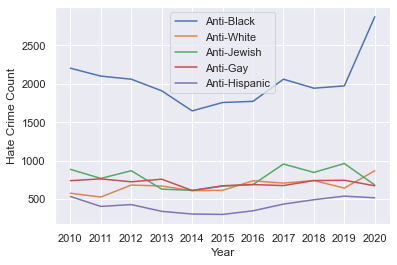

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
B1 = sns.lineplot(x='year',y='count',data=BiasAB,label='Anti-Black')
B2 = sns.lineplot(x='year',y='count',data=BiasAW,label='Anti-White')
B3 = sns.lineplot(x='year',y='count',data=BiasAJ,label='Anti-Jewish')
B4 = sns.lineplot(x='year',y='count',data=BiasAG,label='Anti-Gay')
B5 = sns.lineplot(x='year',y='count',data=BiasAH,label='Anti-Hispanic')
plt.legend()
B5.set(xlabel='Year', ylabel='Hate Crime Count')

This graph plots the top 5 most common groups that are targeted for hate crimes from the years 2010-2020. For all categories there is a noticeable downwards trend during 2013-2014, but then it picks back up and each one peaks around 2019-2020. Both Anti-Black and Anti-White increase from 2019-2020, which is around the advent of the election. Our initial impressions are that they all increase due to tensions from the 2020 election and that news articles released around this time could instigate more hate crimes, the elections being the catalysts that sparked the creation of these negative articles.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

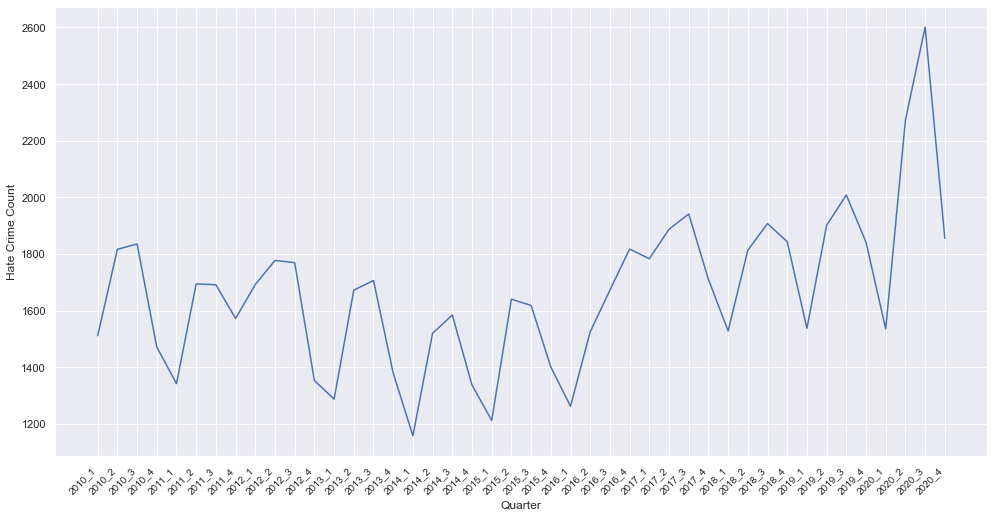

In [15]:
sns.set(rc={'figure.figsize':(16.7,8.27)})
I1 = sns.lineplot(x='quarters',y='count',data=ICBigDF)
I1.set(xlabel='Quarter', ylabel='Hate Crime Count')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10
)

After grouping up all of the Incident Counts by Quarter for the years 2010-2020 we have found that although the counts tend to spike up and down, there is an overall upwards trend. From 2010-2015 there was a downwards trend on the total amount of hate crimes per quarter, and 2015 onwards they have only increased. 2016 Quarter 2 and later has a massive spike in hate crimes that hits an all time high in 2020. Our initial impressions are that these would be due to the 2016 and 2020 elections, and as mentioned above, how the news reports on these political events.

In [16]:
#This block is where we'll use VADER sentiment analysis in order to determine the negativity aspect
vaderData1 = pd.DataFrame()
analyzer = SentimentIntensityAnalyzer()
for title in News2010['Title']:
    vs = analyzer.polarity_scores(title)
    vaderData1 = vaderData1.append(vs, ignore_index=True)
    
vaderData2 = pd.DataFrame()
for title in News2011['Title']:
    vs = analyzer.polarity_scores(title)
    vaderData2 = vaderData2.append(vs, ignore_index=True)

vaderData3 = pd.DataFrame()
for title in News2012['Title']:
    vs = analyzer.polarity_scores(title)
    vaderData3 = vaderData3.append(vs, ignore_index=True)

vaderData4 = pd.DataFrame()
for title in News2013['Title']:
    vs = analyzer.polarity_scores(title)
    vaderData4 = vaderData4.append(vs, ignore_index=True)

vaderData5 = pd.DataFrame()
for title in News2014['Title']:
    vs = analyzer.polarity_scores(title)
    vaderData5 = vaderData5.append(vs, ignore_index=True)

vaderData6 = pd.DataFrame()
for title in News2015['Title']:
    vs = analyzer.polarity_scores(title)
    vaderData6 = vaderData6.append(vs, ignore_index=True)

vaderData7 = pd.DataFrame()
for title in News2016['Title']:
    vs = analyzer.polarity_scores(title)
    vaderData7 = vaderData7.append(vs, ignore_index=True)

vaderData8 = pd.DataFrame()
for title in News2017['Title']:
    vs = analyzer.polarity_scores(title)
    vaderData8 = vaderData8.append(vs, ignore_index=True)

vaderData9 = pd.DataFrame()
for title in News2018['Title']:
    vs = analyzer.polarity_scores(title)
    vaderData9 = vaderData9.append(vs, ignore_index=True)

vaderData10 = pd.DataFrame()
for title in News2019['Title']:
    vs = analyzer.polarity_scores(title)
    vaderData10 = vaderData10.append(vs, ignore_index=True)

vaderData11 = pd.DataFrame()
for title in News2020['Title']:
    vs = analyzer.polarity_scores(title)
    vaderData11 = vaderData11.append(vs, ignore_index=True)
# vaderData1.head()

In [17]:
vaderData1.describe()

,neg,neu,pos,compound
count,100.000000,100.000000,100.000000,100.000000
mean,0.136400,0.782920,0.080700,-0.103792
std,0.163079,0.175171,0.130255,0.386881
min,0.000000,0.392000,0.000000,-0.831600
25%,0.000000,0.658750,0.000000,-0.445000
50%,0.000000,0.769000,0.000000,0.000000
75%,0.275250,1.000000,0.164000,0.019300
max,0.507000,1.000000,0.608000,0.715200


Above we see an example of what is contained in the results of running Vader Sentiment Analysis, which has neg, neu, pos, and compound. 

<AxesSubplot:xlabel='avgpos', ylabel='Count'>

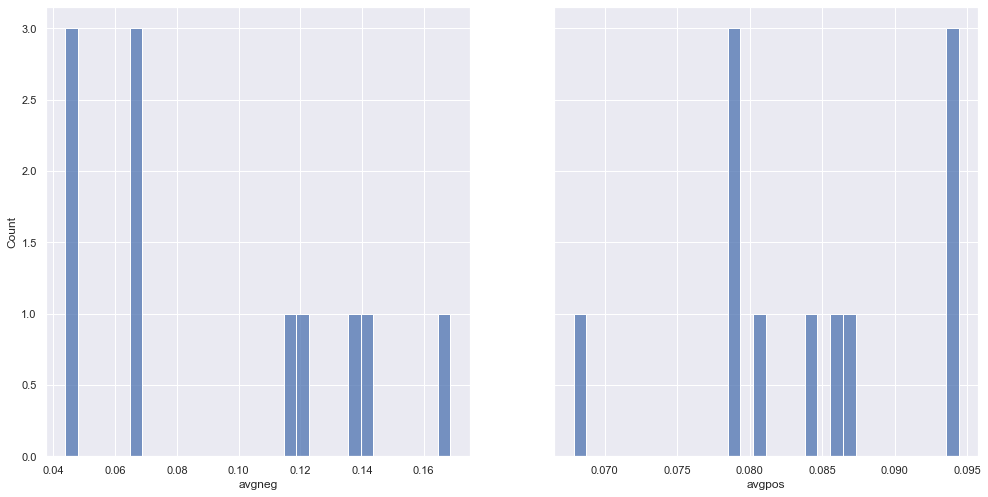

In [26]:
def getNegAvg(vade):
    negSum = vade['neg'].sum()
    negCount = vade.shape[0]
    return negSum/negCount;
def getPosAvg(vade):
    posSum = vade['pos'].sum()
    posCount = vade.shape[0]
    return posSum/posCount;
def getCompAvg(vade):
    compSum = vade['compound'].sum()
    compCount = vade.shape[0]
    return compSum/compCount;

bigVaderDF = pd.DataFrame();
bigVaderDF['avgneg'] = [getNegAvg(vaderData1),getNegAvg(vaderData2),getNegAvg(vaderData3),getNegAvg(vaderData4),getNegAvg(vaderData5),getNegAvg(vaderData6),getNegAvg(vaderData7),getNegAvg(vaderData8),getNegAvg(vaderData9),getNegAvg(vaderData10),getNegAvg(vaderData11)]
bigVaderDF['avgpos'] = [getPosAvg(vaderData1),getPosAvg(vaderData2),getPosAvg(vaderData3),getPosAvg(vaderData4),getPosAvg(vaderData5),getPosAvg(vaderData6),getPosAvg(vaderData7),getPosAvg(vaderData8),getPosAvg(vaderData9),getPosAvg(vaderData10),getPosAvg(vaderData11)]
bigVaderDF['avgcomp'] = [getCompAvg(vaderData1),getCompAvg(vaderData2),getCompAvg(vaderData3),getCompAvg(vaderData4),getCompAvg(vaderData5),getCompAvg(vaderData6),getCompAvg(vaderData7),getCompAvg(vaderData8),getCompAvg(vaderData9),getCompAvg(vaderData10),getCompAvg(vaderData11)]

bigVaderDF.head()

# outcomes_1, predictors_1 = patsy.dmatrices('overall ~ nationality',df_articles_HC)
# model = sm.OLS(outcome,predictors)
# res_1 = model.fit()
# print(res_1.summary())

graph, (ax1, ax2) = plt.subplots(ncols=2,sharey=True)

sns.histplot(bigVaderDF["avgneg"], ax = ax1, kde = False, bins = 30)

sns.histplot(bigVaderDF["avgpos"], ax = ax2, kde = False, bins = 30)



# we will use the above code once we have a dataset of vader sentiment analyzed articles mixed with hate crime stats, to compare them
# aka, as the amount of articles with negative sentiment go up, does the amount of hate crimes increase?

Vader Sentiment Analysis analyzes how positive, negative, and neutral the words are in text. Running the analysis once will result in 3 measurements: pos (Positive), neg (Negative), and neu (Neutral). For each of the 10 datasets we had that contains 100 news articles each, we found the average of the Negative (avgneg) and Positive (avgpos) measurements resulting from running Vader on each article individually. These are graphed above. The results show that things get far more negative than they do positive, with a maximum negative rating of 0.16+ compared to a maximum positive rating of 0.095+. Additionally, the majority of the average negatives are more negative (above the 0.10 threshold) than all of the positives, since the highest average positive only reaches around 0.095. The downside to this analysis is that it is not fully representative of the time period we are attempting to analyze, due to the mediastack API malfunctioning. The articles we have analyzed above are from 2022. The fact that articles from 2022 are far more negative than they are positive and the fact that the trends we showed in the Hate Crime graphs showed massive increases in Hate Crimes in recent years is a positive correlation. i.e. Both of the 2 separate datasets that have been analyzed thus far have shown that negativity is very high for the types of rhetoric used in articles and the amount of Hate Crimes is on an upward trend. This does not necessarily prove that one being very high in negativity/hate crime causes the other to be high in negativity/hate crime, but both happen to be high in the same time period. 

# Ethics & Privacy

We believe that there are no privacy concerns regarding our dataset. The data pulled for the hate crime statistics is available online on the FBI's website, and as for the articles, they do include the name of the authors, but we removed them from our statistics as we don't need them. 

Yet, one concern that we recognized could be articles that have a paywall that the API we are using may be able to bypass and let us use as data. This is a problem since then someone could read that article(s) or at least part of the content for free. Another more important issue will be how people react to seeing the statistics of the many aggressive articles or the amount of articles that exaggerate issues. People could start to hold negative views towards all of the news sources we gathered the articles from, or start to agree with said hate crimes or extremism. Additionally, by holding these personal types of negative views, it is possible that news source do not accurately report the hate crimes as reported by the victims. Therefore, this increases the potential for bias.* 


# Conclusion & Discussion

Hate Crimes in the US were steady until about 2016 where they have been increasing ever since. Most would immediately think of the 2016 and 2020 Elections being the primary cause of this increase, and those people would be right, but there are many smaller factors within the umbrella of the Elections that contribute to this. The News articles released around 2022 have shown to be far more negative (0.16) than they are positive (0.095). This information combined with the fact that 2016 onwards had an increasing amount of Hate Crimes leads us to believe that news articles did have an impact on Hate Crimes, that the massive negativity that news has nowadays did increase the amount and/or the rate at which they are committed. The Data and Analysis we have done above is not conclusive evidence that the negativity of news articles affects the amount/rate of hate crimes, since we would need to analyze data from the same time period as the FBI Statistics, but we can draw conclusions from what little news data we had to work with. We originally planned to use news data from 2010-2020, the same time period the FBI Hate Crime statistics are from, but we had issues using the Mediastack API. 

During the EDA step we were not as thorough as we needed to be while playing around with our chosen API. Mediastack has several issues and its documentation often contradicts itself. There is seemingly no support for the API but it has a fully operational front/website as well as paid options that lead us to believe it was legitamite. We cornered ourselves into a weird spot due to our failing in thoroughly testing it out, this could be a good lesson for future groups. Please check your APIs Github thoroughly for current and or old issues. We've tried contacting the creators of the API, but unfortunately they wouldn't respond. We believe the developers have left the barebones functionality up for the API which is what hindered us from creating more accurate analysis. Apologies.

# Team Contributions

- Scott Andrews -> Mediastack News API (Worst API I have ever used); retrieved news articles from several outlets and helped create the news media data frames. 
- Steven Youssef -> VADER Sentiment importing and cleaning and working with Mediastack API, Research Question.
- Connor Moore -> FBI Statistics Data cleaning, Analysis, and Graphs. Vader Sentiment Analysis and Graphs. Portion of the Conclusion, Datasets, Hypothesis
- Sung Cho ->  Ethics & Privacy, API researching, and background research
- Edgar Diaz -> Topic researching an and API researching